# CS6140 Machine Learning: Assignment 4 (F22) (Total Points: 100)
## Prof. Ahmad Uzair


## 1. Anomaly Detection (30 points)


In [35]:
import numpy as np
import pandas as pd
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import LocalOutlierFactor

**Part A (5 Points):**

By dividing a data set into quartiles, IQR is used to measure variability. The data is sorted ascending and divided into four equal parts. Q1, Q2, Q3, also known as the first, second, and third quartiles, are the values that separate the four equal parts.

Use the following data points to calculate outliers in the data
data = [12, 4, 8, 10, 6, 2, 50]

Using a box plot, show the outliers in the box plot.

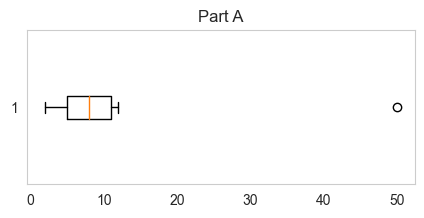

In [2]:
df_A = pd.DataFrame([12, 4, 8, 10, 6, 2, 50])

plt.figure(figsize = (5, 2))
plt.boxplot(df_A, vert = False)
plt.grid(False)
plt.title('Part A')
plt.show()

**Part B (5 points):**

Using the formula to calculate the Z-score detect outliers in the following data points.
data = [6, 3, 9, 6, 9, 3, 3, 50, 6, 6, 9, 9, 3, 6, 3]
Using a box plot, show the outliers in the box plot.

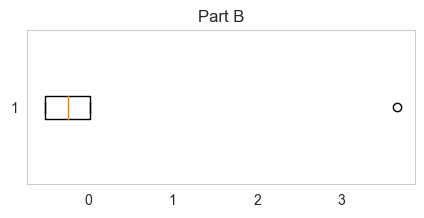

In [3]:
data_B = np.array([6, 3, 9, 6, 9, 3, 3, 50, 6, 6, 9, 9, 3, 6, 3])
data_B_mean = np.mean(data_B, axis = 0)
data_B_std = np.std(data_B, axis = 0)
data_B_z = (data_B - data_B_mean) / data_B_std

df_B = pd.DataFrame(data_B_z)

plt.figure(figsize = (5, 2))
plt.boxplot(df_B, vert = False)
plt.grid(False)
plt.title('Part B')
plt.show()

**Part C (20 points):**

Use the dataset attached for identifying the outliers using Z-score. 

Steps to follow in this question

- Step1(5 points): Show outliers using histograms and scatterplots. Then 

- Step2(7 points): Identify the outliers using Z-score for SalePrice column by using atleast 4 different thresholds.

- Step3(4 points): Print the number of outliers removed.

- Step4(6 points): Use LocalOutlierFactor as discussed in the class to plot the outliers from SalePrice and LotArea columns.

In [4]:
data_C = pd.read_csv('outlier_assignment.csv').loc[:, ('SalePrice', 'LotArea')]

In [5]:
def set_color(df, thre):
    cols = []
    for i in df:
        if i > thre or i < -thre:
            cols.append('red')
        else:
            cols.append('blue')
    return cols

##### Histograms, scatterplots, and boxplots

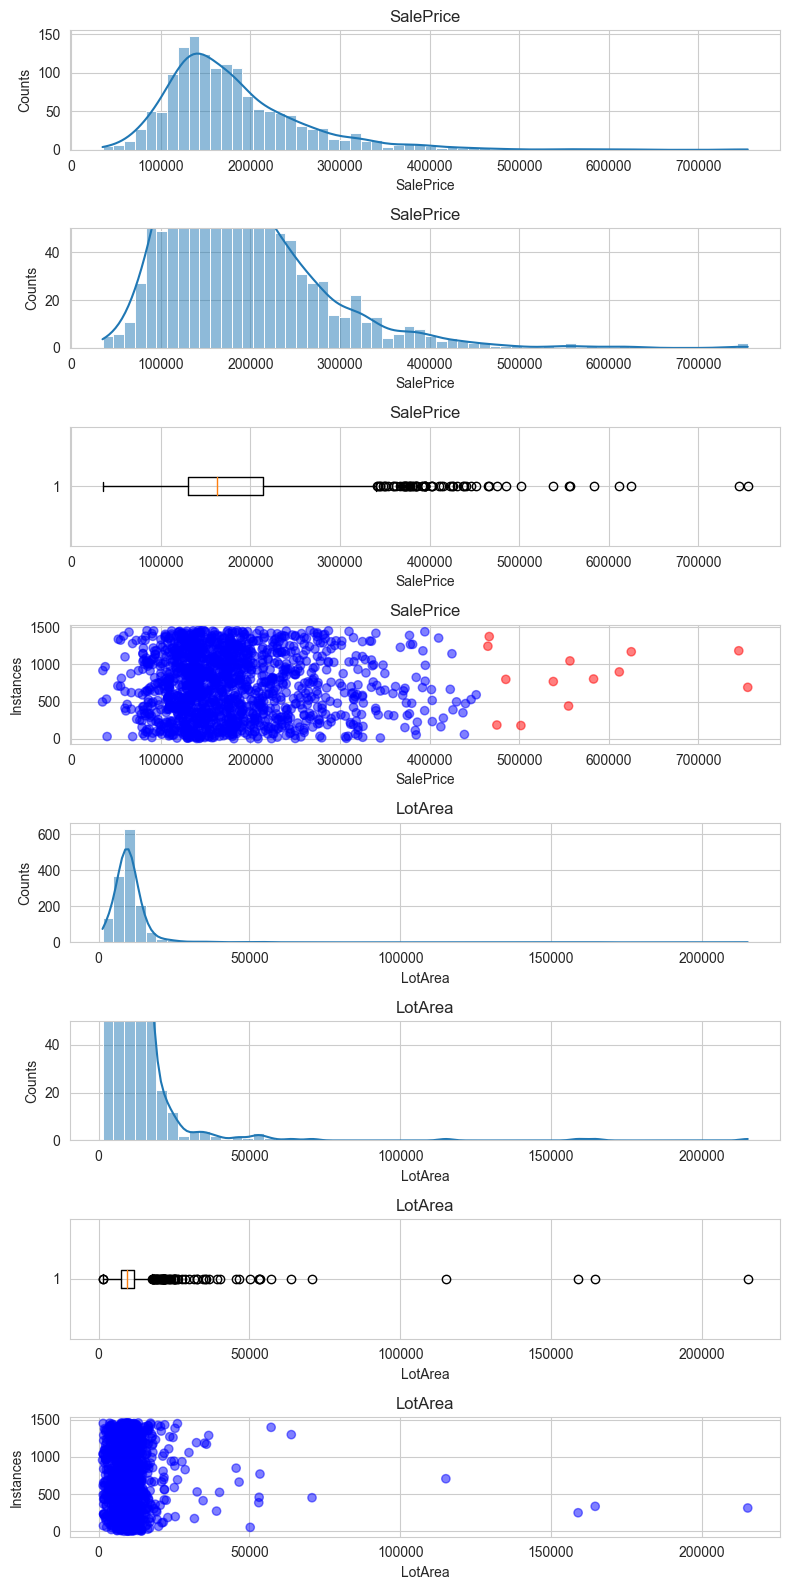

In [6]:
fig_1 = plt.figure(figsize = (8, 16))

plt.subplot(8, 1, 1)
sns.histplot(data_C.SalePrice, bins = 60, kde = True)
plt.title('SalePrice')
plt.xlabel('SalePrice')
plt.ylabel('Counts')
plt.subplot(8, 1, 2)
sns.histplot(data_C.SalePrice, bins = 60, kde = True)
plt.title('SalePrice')
plt.xlabel('SalePrice')
plt.ylabel('Counts')
plt.ylim([0, 50])
plt.subplot(8, 1, 3)
plt.boxplot(data_C.SalePrice, vert = False)
plt.title('SalePrice')
plt.xlabel('SalePrice')
plt.subplot(8, 1, 4)
plt.scatter(x = data_C.SalePrice, y = range(data_C.shape[0]), c = set_color(data_C.SalePrice, data_C.SalePrice.mean() * 2.5), alpha = 0.5)
plt.title('SalePrice')
plt.xlabel('SalePrice')
plt.ylabel('Instances')

plt.subplot(8, 1, 5)
sns.histplot(data_C.LotArea, bins = 60, kde = True)
plt.title('LotArea')
plt.xlabel('LotArea')
plt.ylabel('Counts')
plt.subplot(8, 1, 6)
sns.histplot(data_C.LotArea, bins = 60, kde = True)
plt.title('LotArea')
plt.xlabel('LotArea')
plt.ylabel('Counts')
plt.ylim([0, 50])
plt.subplot(8, 1, 7)
plt.boxplot(data_C.LotArea, vert = False)
plt.title('LotArea')
plt.xlabel('LotArea')
plt.subplot(8, 1, 8)
plt.scatter(x = data_C.LotArea, y = range(data_C.shape[0]), c = set_color(data_C.LotArea, data_C.SalePrice.mean() * 2.5), alpha = 0.5)
plt.title('LotArea')
plt.xlabel('LotArea')
plt.ylabel('Instances')

plt.tight_layout()
plt.show()

##### Z-score with 4 thresholds

In [8]:
sale_price = data_C.SalePrice
sale_price_mean = np.mean(sale_price, axis = 0)
sale_price_std = np.std(sale_price, axis = 0)
sale_price_z = (sale_price - sale_price_mean) / sale_price_std

sp_df = pd.DataFrame(sale_price_z)

In [28]:
thresholds = [[2.6, -2.6], [2.8, -2.8], [3, -3], [3.2, -3.2], [3.4, -3.4]]

outliers = []
colors = []
for positive, negative in thresholds:
    outliers.append([])
    colors.append([])
    for i in sp_df.values:
        if i > positive or i < negative:
            outliers[-1].append(i)
            colors[-1].append('r')
        else:
            colors[-1].append('b')

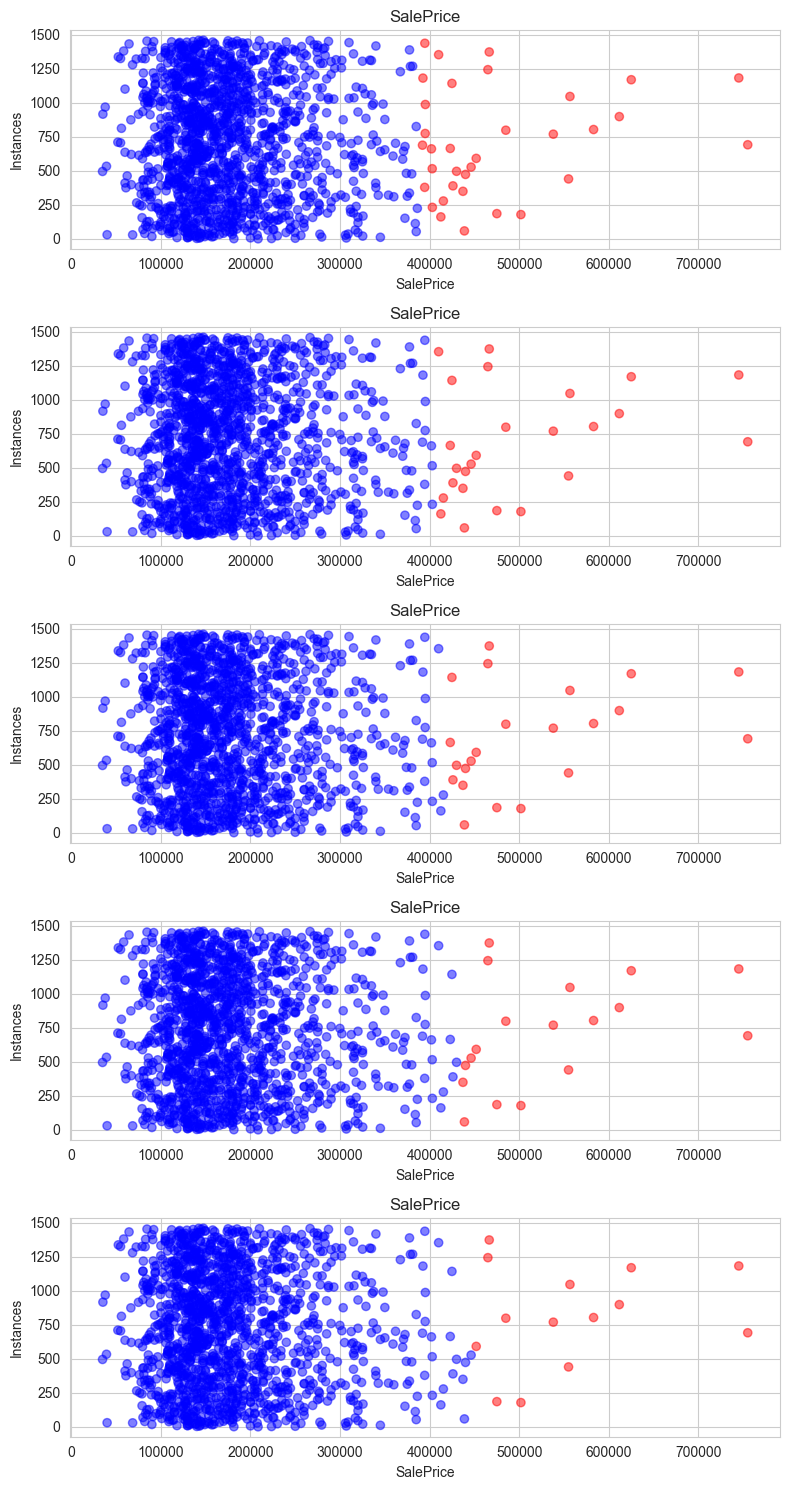

In [31]:
fig_2 = plt.figure(figsize = (8, 15))

for i in range(len(thresholds)):
    plt.subplot(len(thresholds), 1, i + 1)
    plt.scatter(x = data_C.SalePrice, y = range(data_C.shape[0]), c = colors[i], alpha = 0.5)
    plt.title('SalePrice')
    plt.xlabel('SalePrice')
    plt.ylabel('Instances')

plt.tight_layout()
plt.show()

##### Number of outliers removed when threshold = 3

Number of outliers removed when threshold is 3 (and -3):  22


<function matplotlib.pyplot.show(close=None, block=None)>

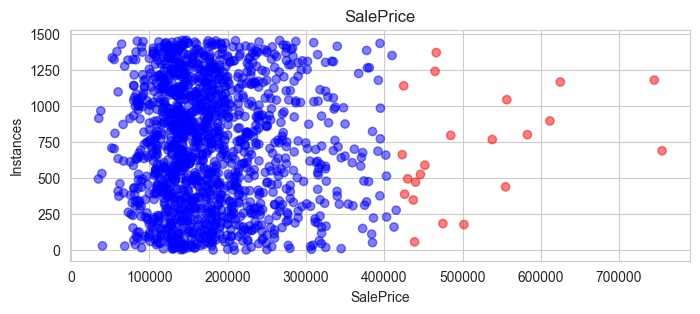

In [34]:
print('Number of outliers removed when threshold is 3 (and -3): ', len(outliers[2]))

fig_3 = plt.figure(figsize = (8, 3))
plt.scatter(x = data_C.SalePrice, y = range(data_C.shape[0]), c = colors[2], alpha = 0.5)
plt.title('SalePrice')
plt.xlabel('SalePrice')
plt.ylabel('Instances')
plt.show

##### LocalOutlierFactor

In [ ]:
np.random.seed(42)

# Generate train data
X_inliers = 0.3 * np.random.randn(100, 2)
X_inliers = np.r_[X_inliers + 2, X_inliers - 2]

# Generate some outliers
X_outliers = np.random.uniform(low=-4, high=4, size=(20, 2))
X = np.r_[X_inliers, X_outliers]

n_outliers = len(X_outliers)
ground_truth = np.ones(len(X), dtype=int)
ground_truth[-n_outliers:] = -1

# fit the model for outlier detection (default)
clf = LocalOutlierFactor(n_neighbors=20, contamination=0.1)
# use fit_predict to compute the predicted labels of the training samples
# (when LOF is used for outlier detection, the estimator has no predict,
# decision_function and score_samples methods).
y_pred = clf.fit_predict(X)
n_errors = (y_pred != ground_truth).sum()
X_scores = clf.negative_outlier_factor_

plt.title("Local Outlier Factor (LOF)")
plt.scatter(X[:, 0], X[:, 1], color="k", s=3.0, label="Data points")
# plot circles with radius proportional to the outlier scores
radius = (X_scores.max() - X_scores) / (X_scores.max() - X_scores.min())
plt.scatter(
    X[:, 0],
    X[:, 1],
    s=1000 * radius,
    edgecolors="r",
    facecolors="none",
    label="Outlier scores",
)
plt.axis("tight")
plt.xlim((-5, 5))
plt.ylim((-5, 5))
plt.xlabel("prediction errors: %d" % (n_errors))
legend = plt.legend(loc="upper left")
legend.legendHandles[0]._sizes = [10]
legend.legendHandles[1]._sizes = [20]
plt.show()